In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [87]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [96]:
# Getting the number of rows and columns
print("Number of rows: {0}, number of columns: {1}".format(df.shape[0], df.shape[1]))

Number of rows: 7043, number of columns: 21


In [103]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [99]:
# Getting the number of missing values in each columns
np.sum(df.isnull())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No NaN values. It looks like this is a clean data set.

In [6]:
# Getting the counts for the number of churned customers vs the current customers
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

This is an inbalanced data, as indicated by the above value counts. The current customers outnumber the churned customers by a significant margin.

In [7]:
# Separating the churned and the current customers into a separate dataframes.
df_churned = df.loc[df["Churn"] == "Yes"].copy()
df_stayed = df.loc[df["Churn"] == "No"].copy()

In [166]:
column_names_to_compare = list(df.columns)
col_to_remove = ["customerID", "tenure", "MonthlyCharges", "TotalCharges", "Churn"]
for name in col_to_remove:
    column_names_to_compare.remove(name)

****gender****


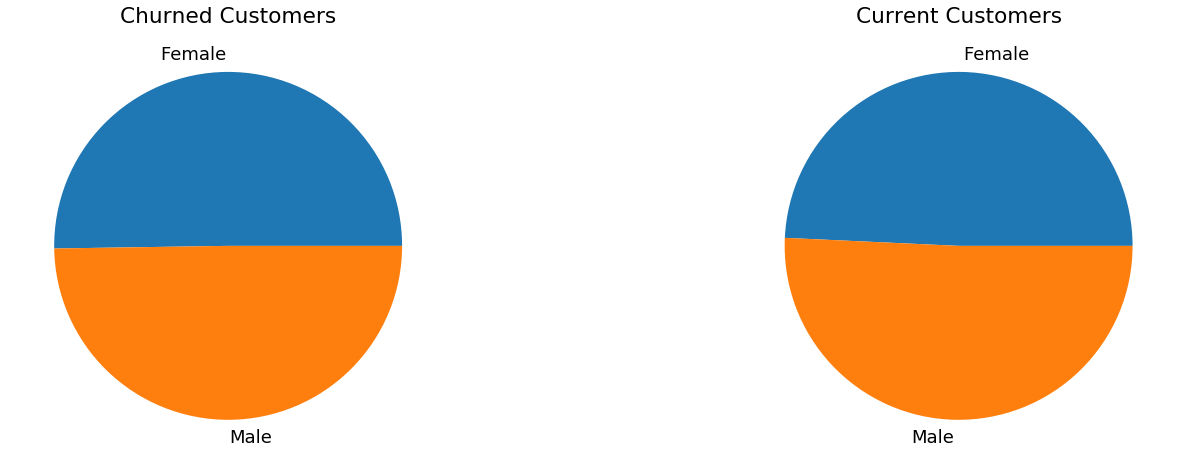



****SeniorCitizen****


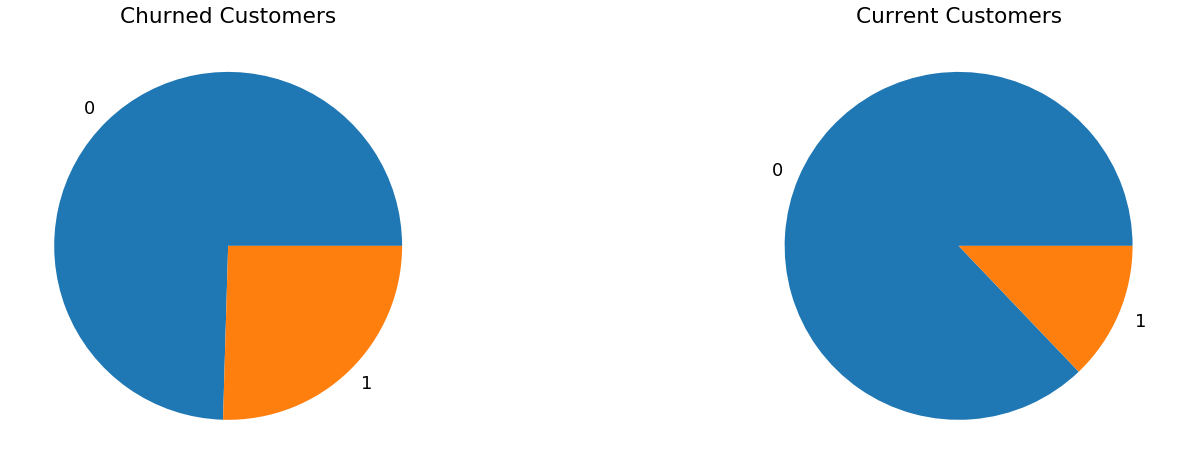



****Partner****


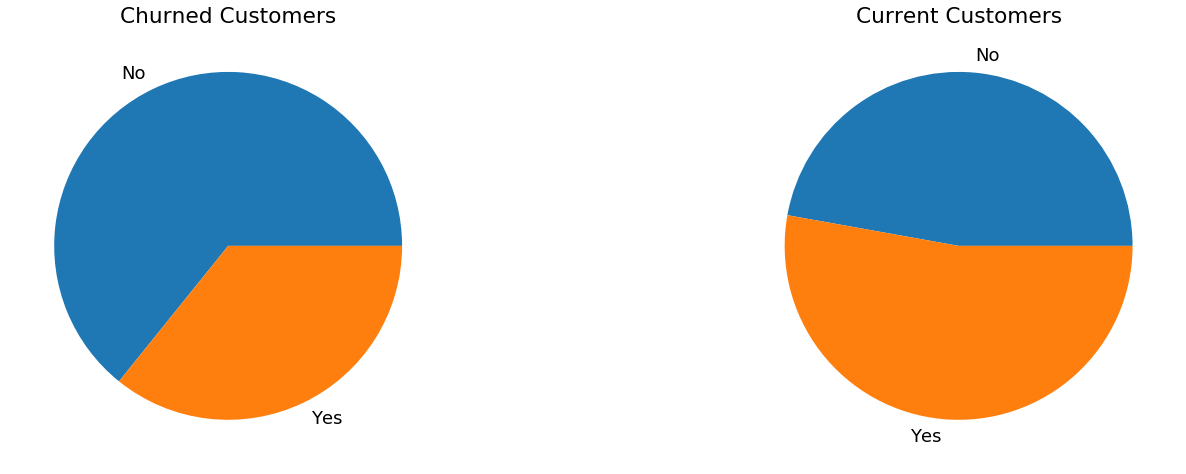



****Dependents****


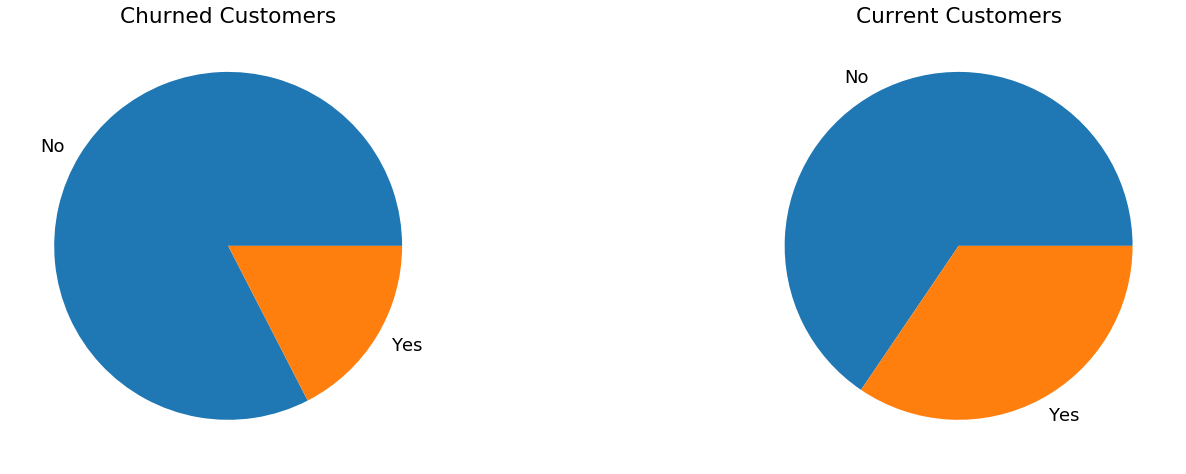



****PhoneService****


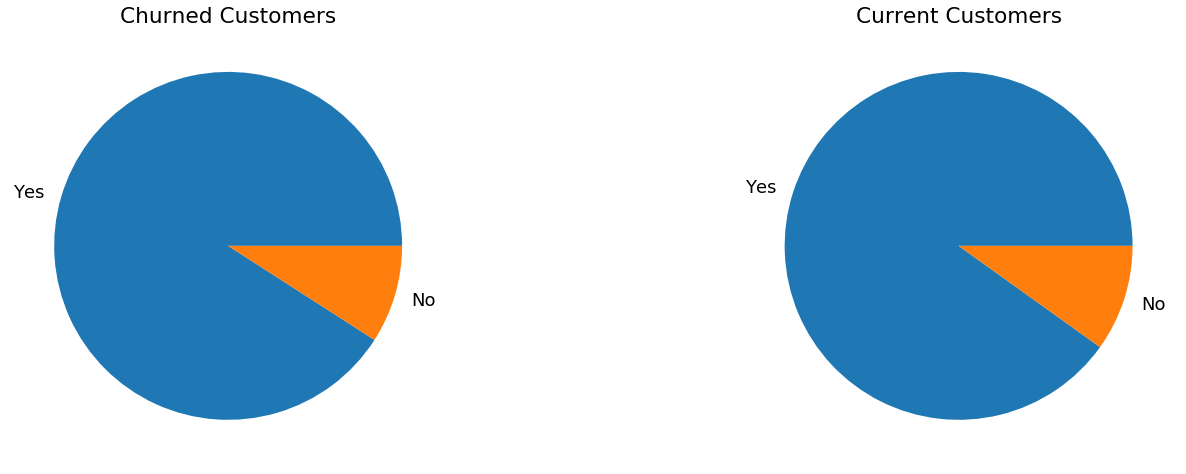



****MultipleLines****


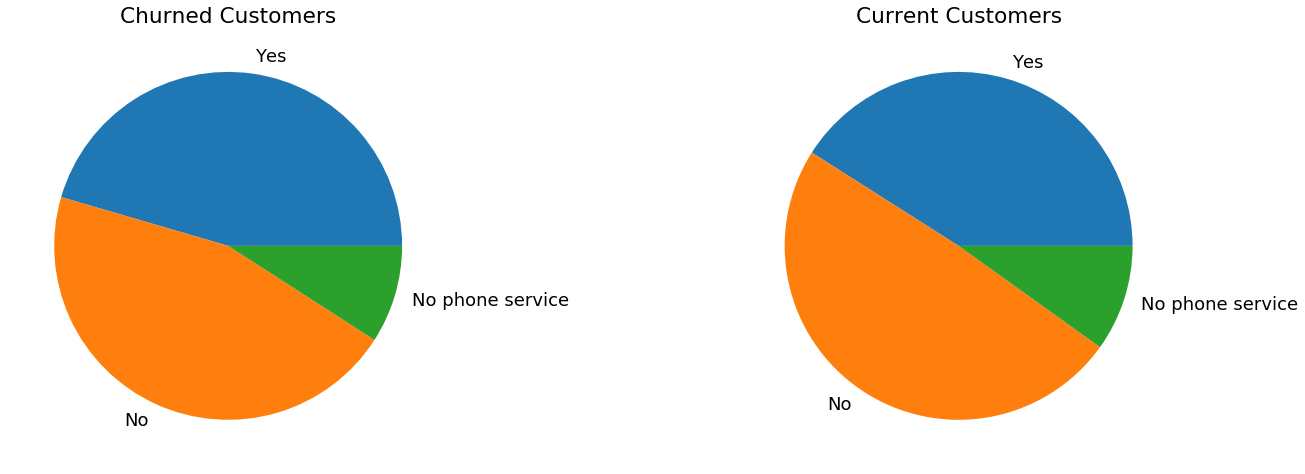



****InternetService****


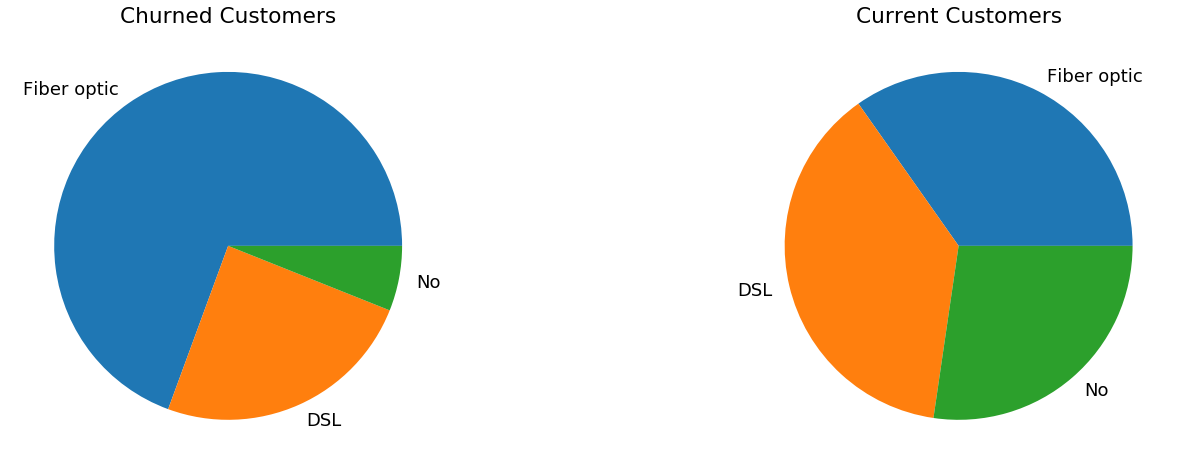



****OnlineSecurity****


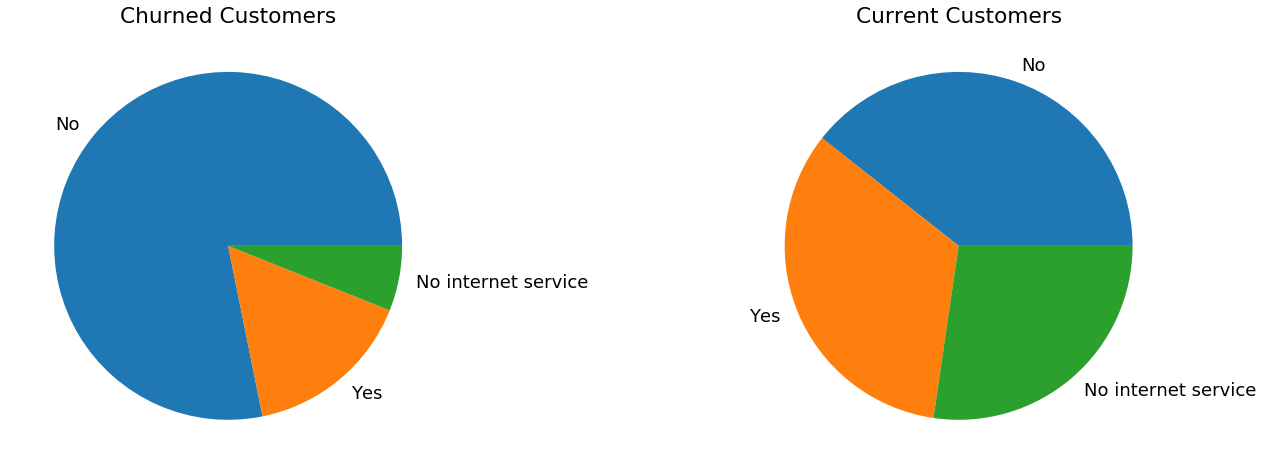



****OnlineBackup****


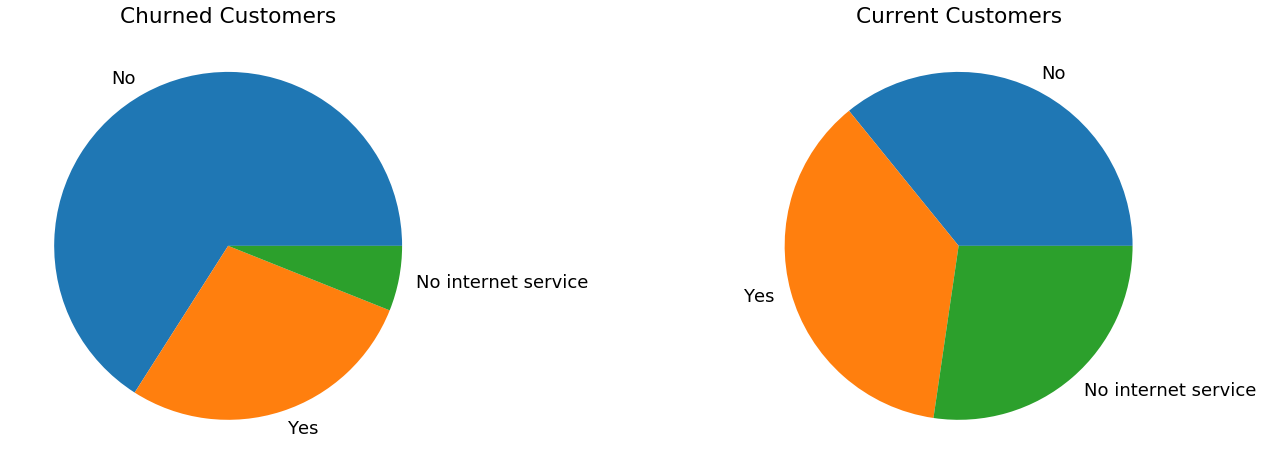



****DeviceProtection****


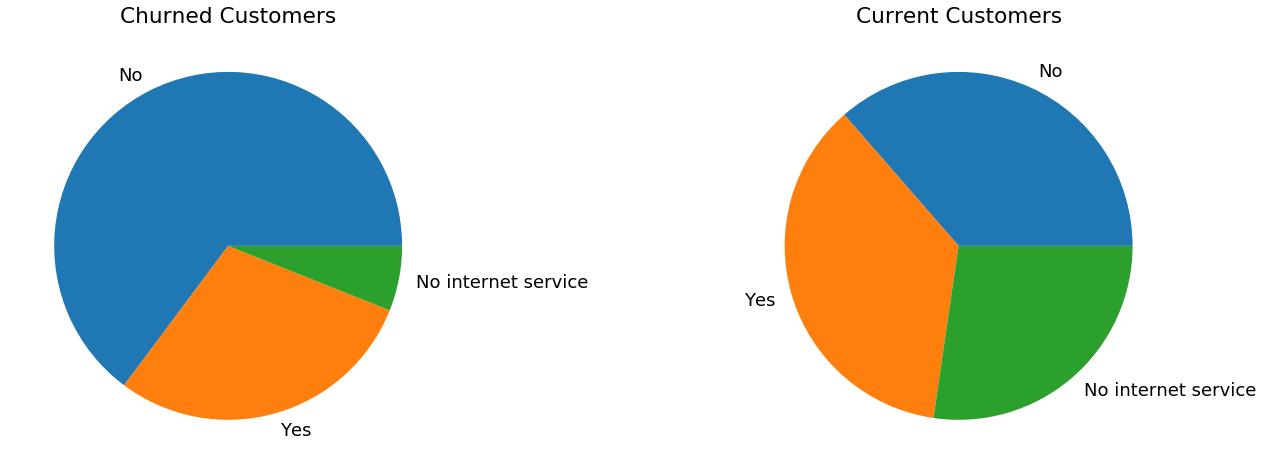



****TechSupport****


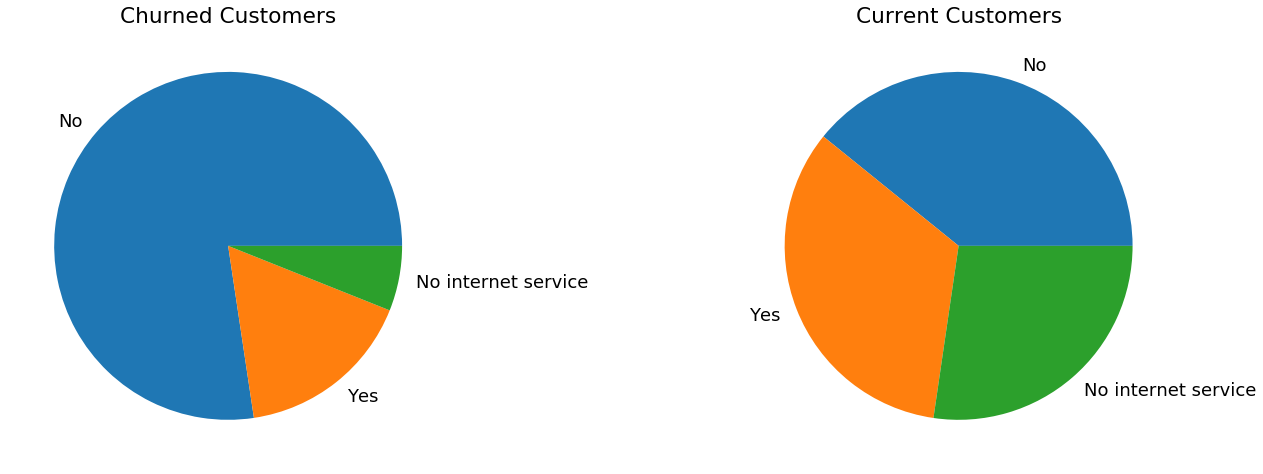



****StreamingTV****


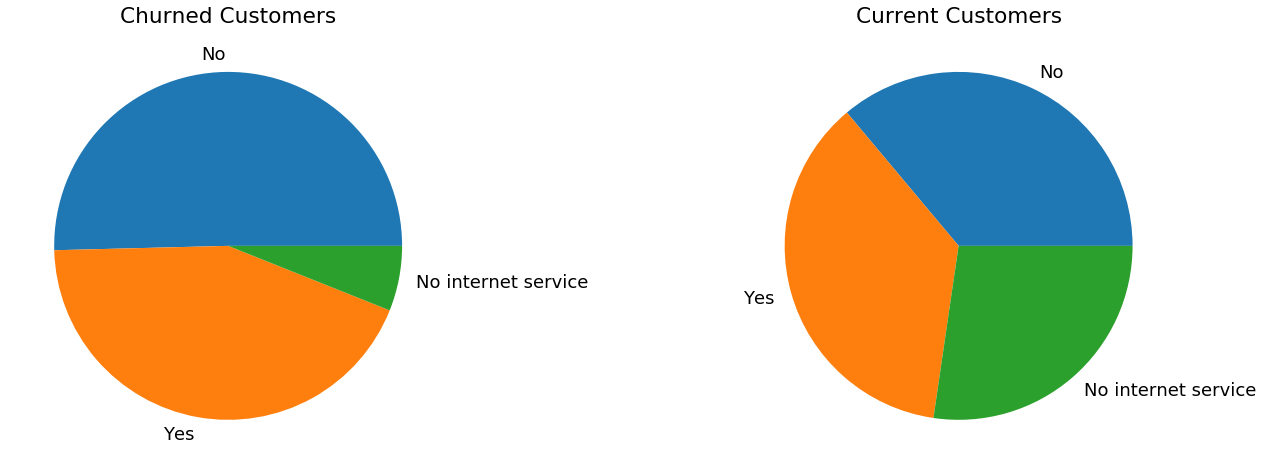



****StreamingMovies****


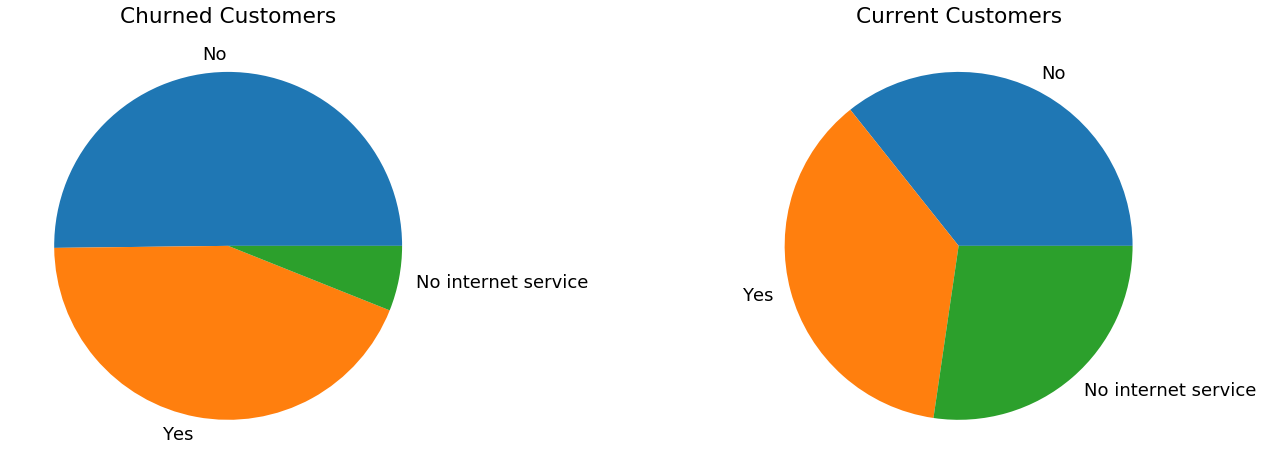



****Contract****


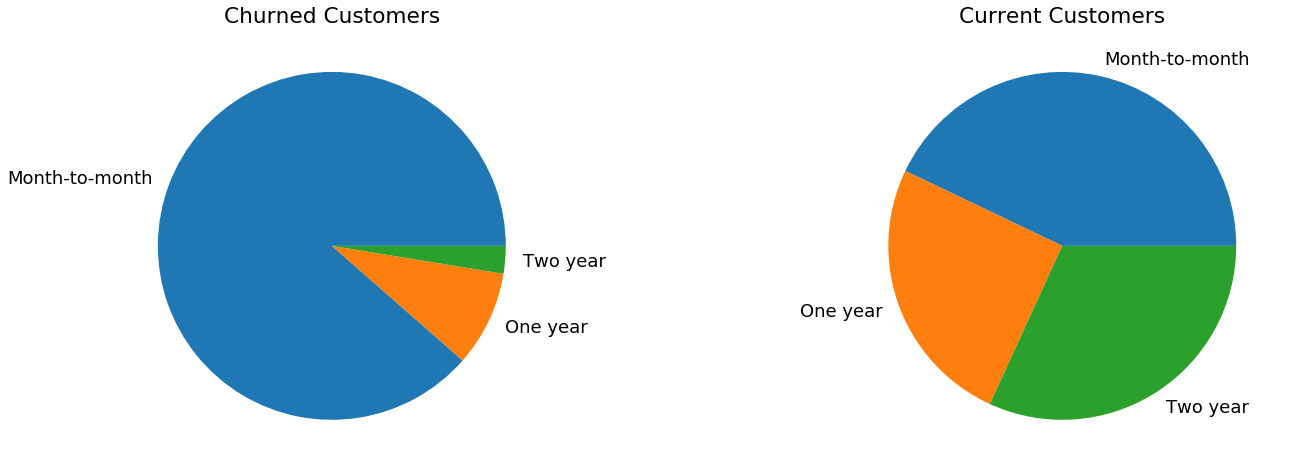



****PaperlessBilling****


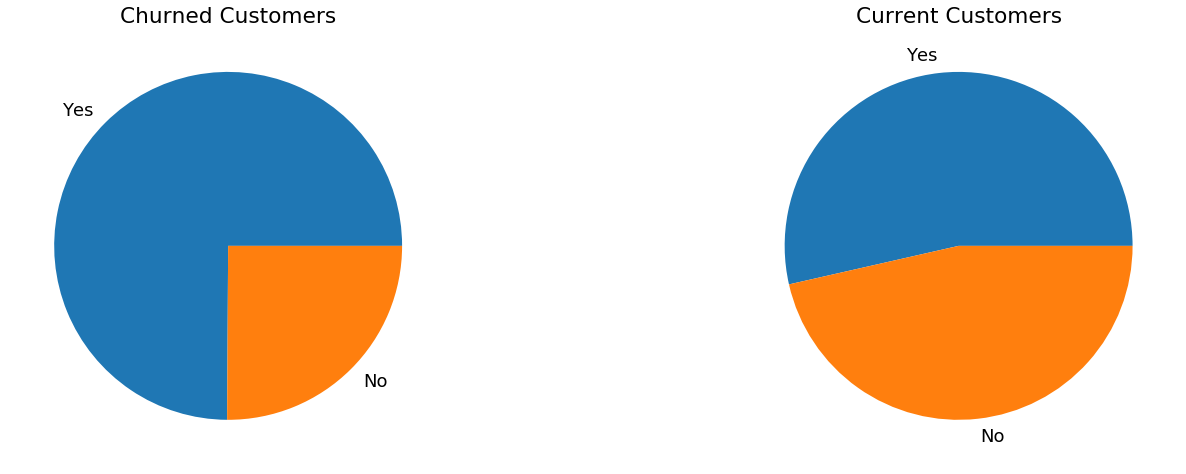



****PaymentMethod****


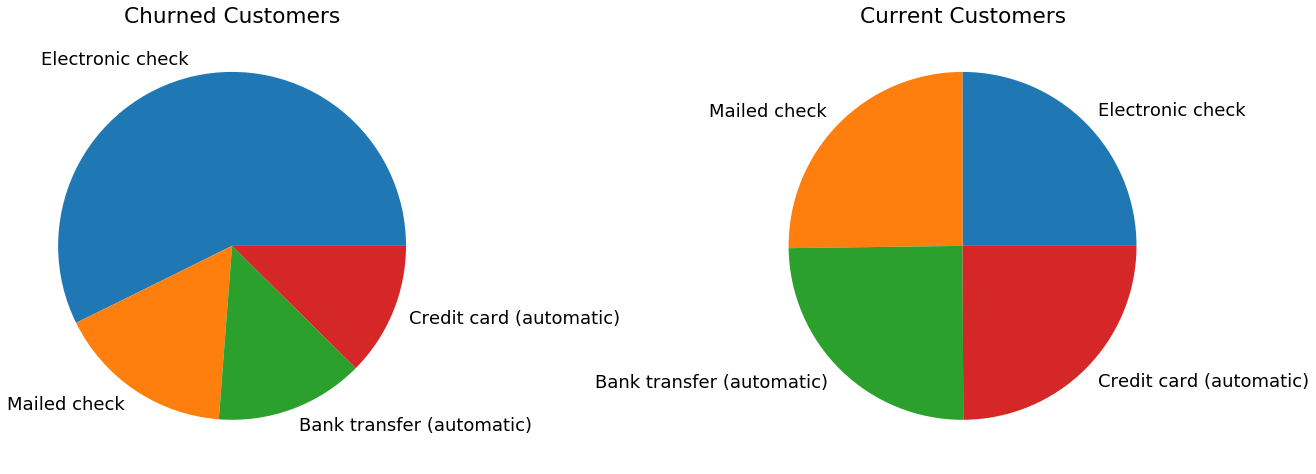

In [195]:
for col_name in column_names_to_compare:
    churned_count = df_churned[col_name].value_counts()
    stayed_count = df_stayed[col_name].value_counts()
    
    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    
    print("****" + col_name + "****")
    plt.figure()
    
    plt.subplot(1, 2, 1)
    plt.pie(x=churned_values_ordered, labels=ordered_labels)
    plt.title("Churned Customers")
    
    plt.subplot(1, 2, 2)
    plt.pie(x=stayed_values_ordered, labels=ordered_labels)
    plt.title("Current Customers");
    
    plt.show()
    
    print('\n')


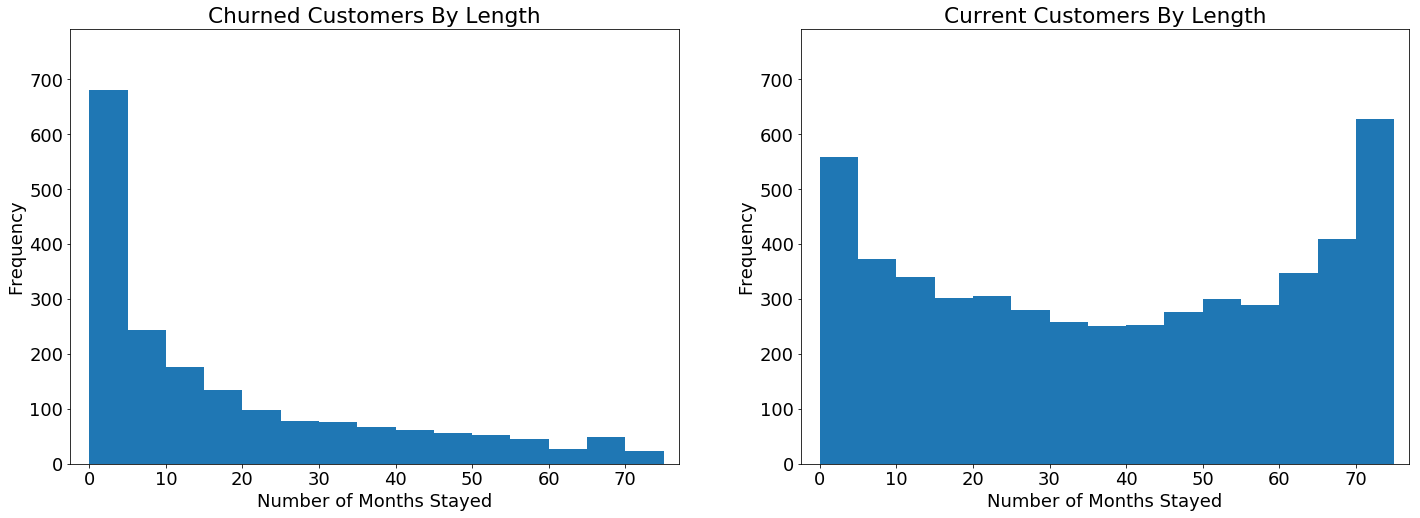

In [93]:
bin_size = 5 # A size of a bin 
bins = np.arange(0, churned_tenure.max()+bin_size, bin_size) # Array of bins

# Get the maxima values to be used for graphs
largest = df_stayed["tenure"].max() # Max value of the tenure column
bin_numbers = (math.ceil(largest/(bin_size * 10)) * 10) # Calculate the number of bins to be graphed. A bit hacky.
count_churned, division_churned = np.histogram(df_churned["tenure"], bin_numbers) # Get the histogram raw data for the churned customers
count_stayed, division_stayed = np.histogram(df_stayed["tenure"], bin_numbers) # Get the histogram raw data for the current customers

max_count_churned = count_churned.max()
max_count_stayed = count_stayed.max()
max_division_churned = division_churned.max()
max_division_stayed = division_stayed.max()

max_count_val = max_count_churned if max_count_churned >= max_count_stayed else max_count_stayed
max_division_val = max_division_churned if max_division_churned >= max_division_stayed else max_division_stayed

max_count_val = round(max_count_val, -1) *  1.1 # Multiply by 1.1 to give the graph a slightly more head room
max_division_val = round(max_division_val) + bin_size

# Create graphs
plt.figure()
plt.rcParams.update({'font.size': 18})

plt.subplot(1, 2, 1)
plt.hist(data=df_churned, x="tenure", bins=bins)
plt.title("Churned Customers By Length")
plt.xlabel("Number of Months Stayed")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, max_count_val)

plt.subplot(1, 2, 2)
plt.hist(data=df_stayed, x="tenure", bins=bins)
plt.title("Current Customers By Length")
plt.xlabel("Number of Months Stayed")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, max_count_val);